In [ ]:
# Libary imports
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

alr4 = importr('alr4')
print("alr4 package imported successfully.")

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


alr4 package imported successfully.


# Problem 6

**Explanation of Problem 6: Sex Discrimination (Data file: salary)**

- Problem 6 is a multiple linear regression. 
- The exercise focused on analyzing potential sex discrimination in the salaries of faculty at a small Midwestern college.
- The goal is to use regression analysis to model <u>academic salary</u> based on several <u>faculty characteristics</u> and to investigate if there is a statistically <u>significant difference in salaries between males and females</u>

In [2]:
# load the salary data from the alr4 package
ro.r['data']('salary', package='alr4')

with localconverter(ro.default_converter + pandas2ri.converter):
    salary_df = ro.r['salary']

print(salary_df.head())
# print(salary_df.info())

    degree  rank     sex  year  ysdeg  salary
1  Masters  Prof    Male    25     35   36350
2  Masters  Prof    Male    13     22   35350
3  Masters  Prof    Male    10     23   28200
4  Masters  Prof  Female     7     27   26775
5      PhD  Prof    Male    19     30   33696


In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 52
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   degree  52 non-null     category
 1   rank    52 non-null     category
 2   sex     52 non-null     category
 3   year    52 non-null     int32   
 4   ysdeg   52 non-null     int32   
 5   salary  52 non-null     int32   
dtypes: category(3), int32(3)
memory usage: 1.5+ KB


The data set, salary, includes the following variables:
 - `salary`: Academic year salary in dollars (Response variable).
 - `sex`: A factor with levels Male and Female.   
 - `degree`: Highest degree (e.g., Masters, PhD).
 - `rank`: Faculty rank (e.g., Prof).
 - `year`: Years in the current rank.
 - `ysdeg`: Years since highest degree.

## 1. Get appropriate graphical summaries of the data and discuss the graphs.

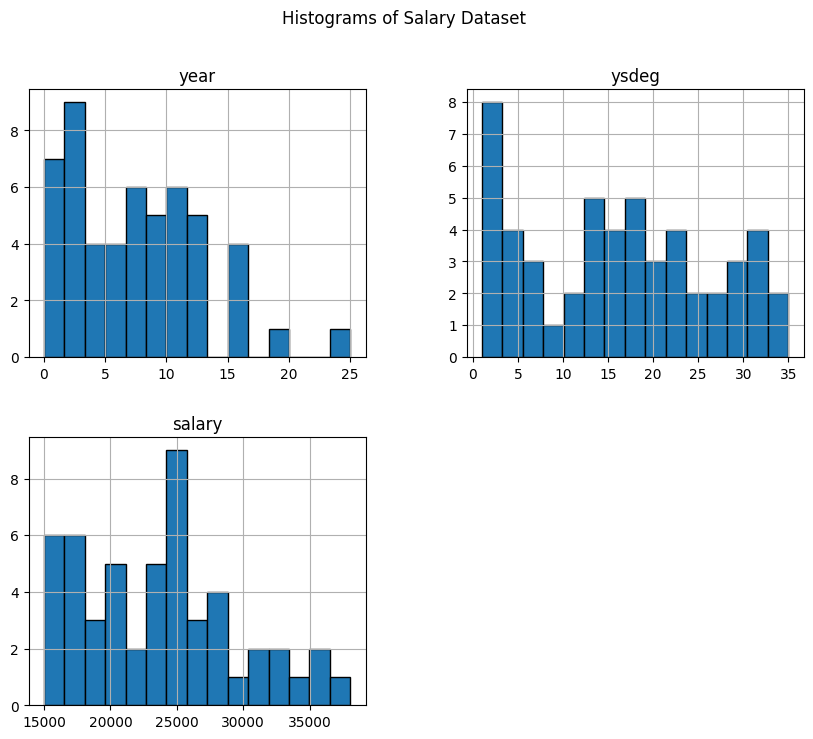

In [4]:
salary_df.hist(bins=15, figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Salary Dataset")
plt.show()

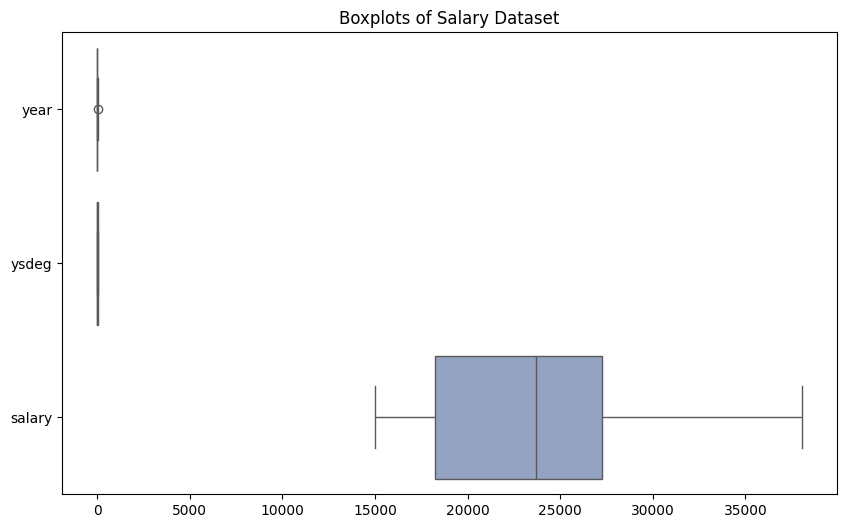

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, orient='h', palette='Set2')
plt.title("Boxplots of Salary Dataset")
plt.show()

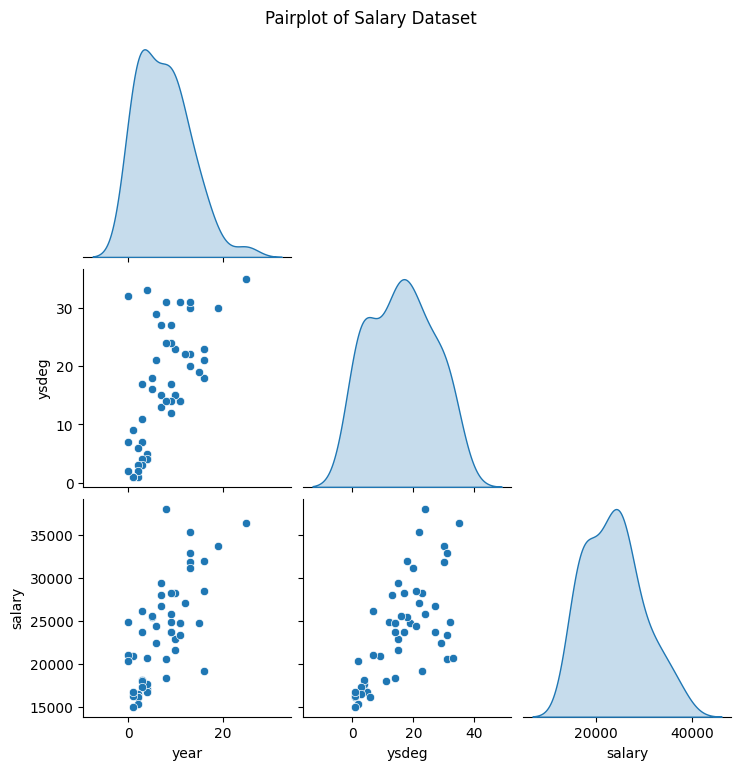

In [6]:
sns.pairplot(salary_df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Salary Dataset", y=1.02)
plt.show()

## 2. Test the hypothesis that the mean salary for men and women is the same. What alternative hypothesis do you think is appropriate?

Hypotheses:
Null Hypothesis (H₀): The mean salary for men and women is the same.

$H_0: \mu_{\text{Male}} = \mu_{\text{Female}}$

Alternative Hypothesis (H₁): The mean salary for men and women is different.

$H_1: \mu_{\text{Male}} \neq \mu_{\text{Female}}$

Alternatively, if you suspect that one gender earns more than the other, you can use a one-tailed test:

$H_1: \mu_{\text{Male}} > \mu_{\text{Female}}$ (if you suspect men earn more)

$H_1: \mu_{\text{Male}} < \mu_{\text{Female}}$ (if you suspect women earn more)

In [7]:
# Separate the salaries by gender
male_salaries = salary_df[salary_df['sex'] == 'Male']['salary']
female_salaries = salary_df[salary_df['sex'] == 'Female']['salary']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean salaries between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean salaries between men and women.")

T-statistic: 1.7744380049367063
P-value: 0.09009405709468926
Fail to reject the null hypothesis: No significant difference in mean salaries between men and women.


## 3. Assuming no interactions between sex and the other predictors, obtain a 95% confidence interval for the difference in salary between males and females.

In [16]:
# Ensure 'sex' is a categorical variable
salary_df['sex'] = salary_df['sex'].astype('category')

# Optional: Set 'Female' as the reference level
salary_df['sex'] = salary_df['sex'].cat.reorder_categories(['Female', 'Male'], ordered=True)

# Fit a linear regression model with salary as the response and sex as the predictor
model = smf.ols('salary ~ sex', data=salary_df).fit()

# Get the confidence interval for the coefficient of sex
conf_int = model.conf_int(alpha=0.05)  # 95% confidence interval
print(conf_int)  # Debug: Inspect the confidence intervals to find the correct label

# Adjust the label based on the output of conf_int
sex_diff_ci = conf_int.loc['sex[T.Male]']  # Update this if the label differs

# Print the results
print("95% Confidence Interval for the difference in salary between males and females:")
print(sex_diff_ci)

                        0             1
Intercept    18253.263379  24461.022335
sex[T.Male]   -291.257020   6970.550253
95% Confidence Interval for the difference in salary between males and females:
0    -291.257020
1    6970.550253
Name: sex[T.Male], dtype: float64


## 4. Model Re-evaluation (Excluding rank)

In [17]:
# Fit a linear regression model excluding the variable 'rank'
model_no_rank = smf.ols('salary ~ sex + degree + year + ysdeg', data=salary_df).fit()

# Summarize the model
print(model_no_rank.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.11
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.05e-09
Time:                        01:12:09   Log-Likelihood:                -499.00
No. Observations:                  52   AIC:                             1008.
Df Residuals:                      47   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.59e+04   1259.866     12.618

# Problem 7

**About the Dataset:**

The `Auto` dataset in R:

- Contains information of various car models.

- Includes variables such as miles per gallon (mpg), number of cylinders, displacement, horsepower, weight, acceleration, year of manufacture, origin, and car name.

**Dataset Details**

- Observations: 392 vehicles (rows).
- Variables: 9 attributes (columns). 

**Variables Description**

The 9 variables in the Auto dataset are:
- `mpg`: miles per gallon (quantitative)
- `cylinders`: number of cylinders (qualitative, though can be treated as quantitative in some analyses)
- `displacement`: engine displacement (cubic inches) (quantitative)
- `horsepower`: engine horsepower (quantitative)
- `weight`: vehicle weight (lbs.) (quantitative)
- `acceleration`: time to accelerate from 0 to 60 mph (seconds) (quantitative)
- `year`: model year (ranging from 1970 to 1982) (qualitative/ordered factor)
- `origin`: region of origin (1. American, 2. European, 3. Japanese) (qualitative/factor)
- `name`: vehicle name (qualitative, non-numeric identifier) 

In [ ]:
# install the ISLR package
# ro.r('install.packages("ISLR")')

R callback write-console: Installing package into 'C:/Users/USer/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)
  


--- Please select a CRAN mirror for use in this session ---


R callback write-console: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.5/ISLR_1.4.zip'
  
R callback write-console: Content type 'application/zip'  
R callback write-console:  length 2938453 bytes (2.8 MB)
  
R callback write-console: downloaded 2.8 MB

  


package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USer\AppData\Local\Temp\RtmpAT44L2\downloaded_packages


In [5]:
# Import the ISLR package
ISLR = importr('ISLR')

# Load the Auto dataset
ro.r('data(Auto)')

with localconverter(ro.default_converter + pandas2ri.converter):
    auto_df = ro.r['Auto']

print(auto_df.head())    

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1  18.0        8.0         307.0       130.0  3504.0          12.0  70.0   
2  15.0        8.0         350.0       165.0  3693.0          11.5  70.0   
3  18.0        8.0         318.0       150.0  3436.0          11.0  70.0   
4  16.0        8.0         304.0       150.0  3433.0          12.0  70.0   
5  17.0        8.0         302.0       140.0  3449.0          10.5  70.0   

   origin                       name  
1     1.0  chevrolet chevelle malibu  
2     1.0          buick skylark 320  
3     1.0         plymouth satellite  
4     1.0              amc rebel sst  
5     1.0                ford torino  


In [ ]:
# save dataframe to csv
# auto_df.to_csv('./datasets/auto_data.csv', index=False)

## 1. Scatterplots of all variables

In [7]:
# Check data types and missing values
print(auto_df.info())
print("\nMissing values per column:\n", auto_df.isnull().sum())

# Drop non-numeric columns for scatterplot matrix
numeric_cols = auto_df.select_dtypes(include=['number']).columns
auto_numeric = auto_df[numeric_cols]

# Optionally, drop rows with missing values in numeric columns
auto_numeric = auto_numeric.dropna()

print("\nNumeric columns used for scatterplot matrix:\n", numeric_cols)

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 1 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    float64 
 7   origin        392 non-null    float64 
 8   name          392 non-null    category
dtypes: category(1), float64(8)
memory usage: 38.8+ KB
None

Missing values per column:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Numeric columns used for scatterplot matrix:
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'

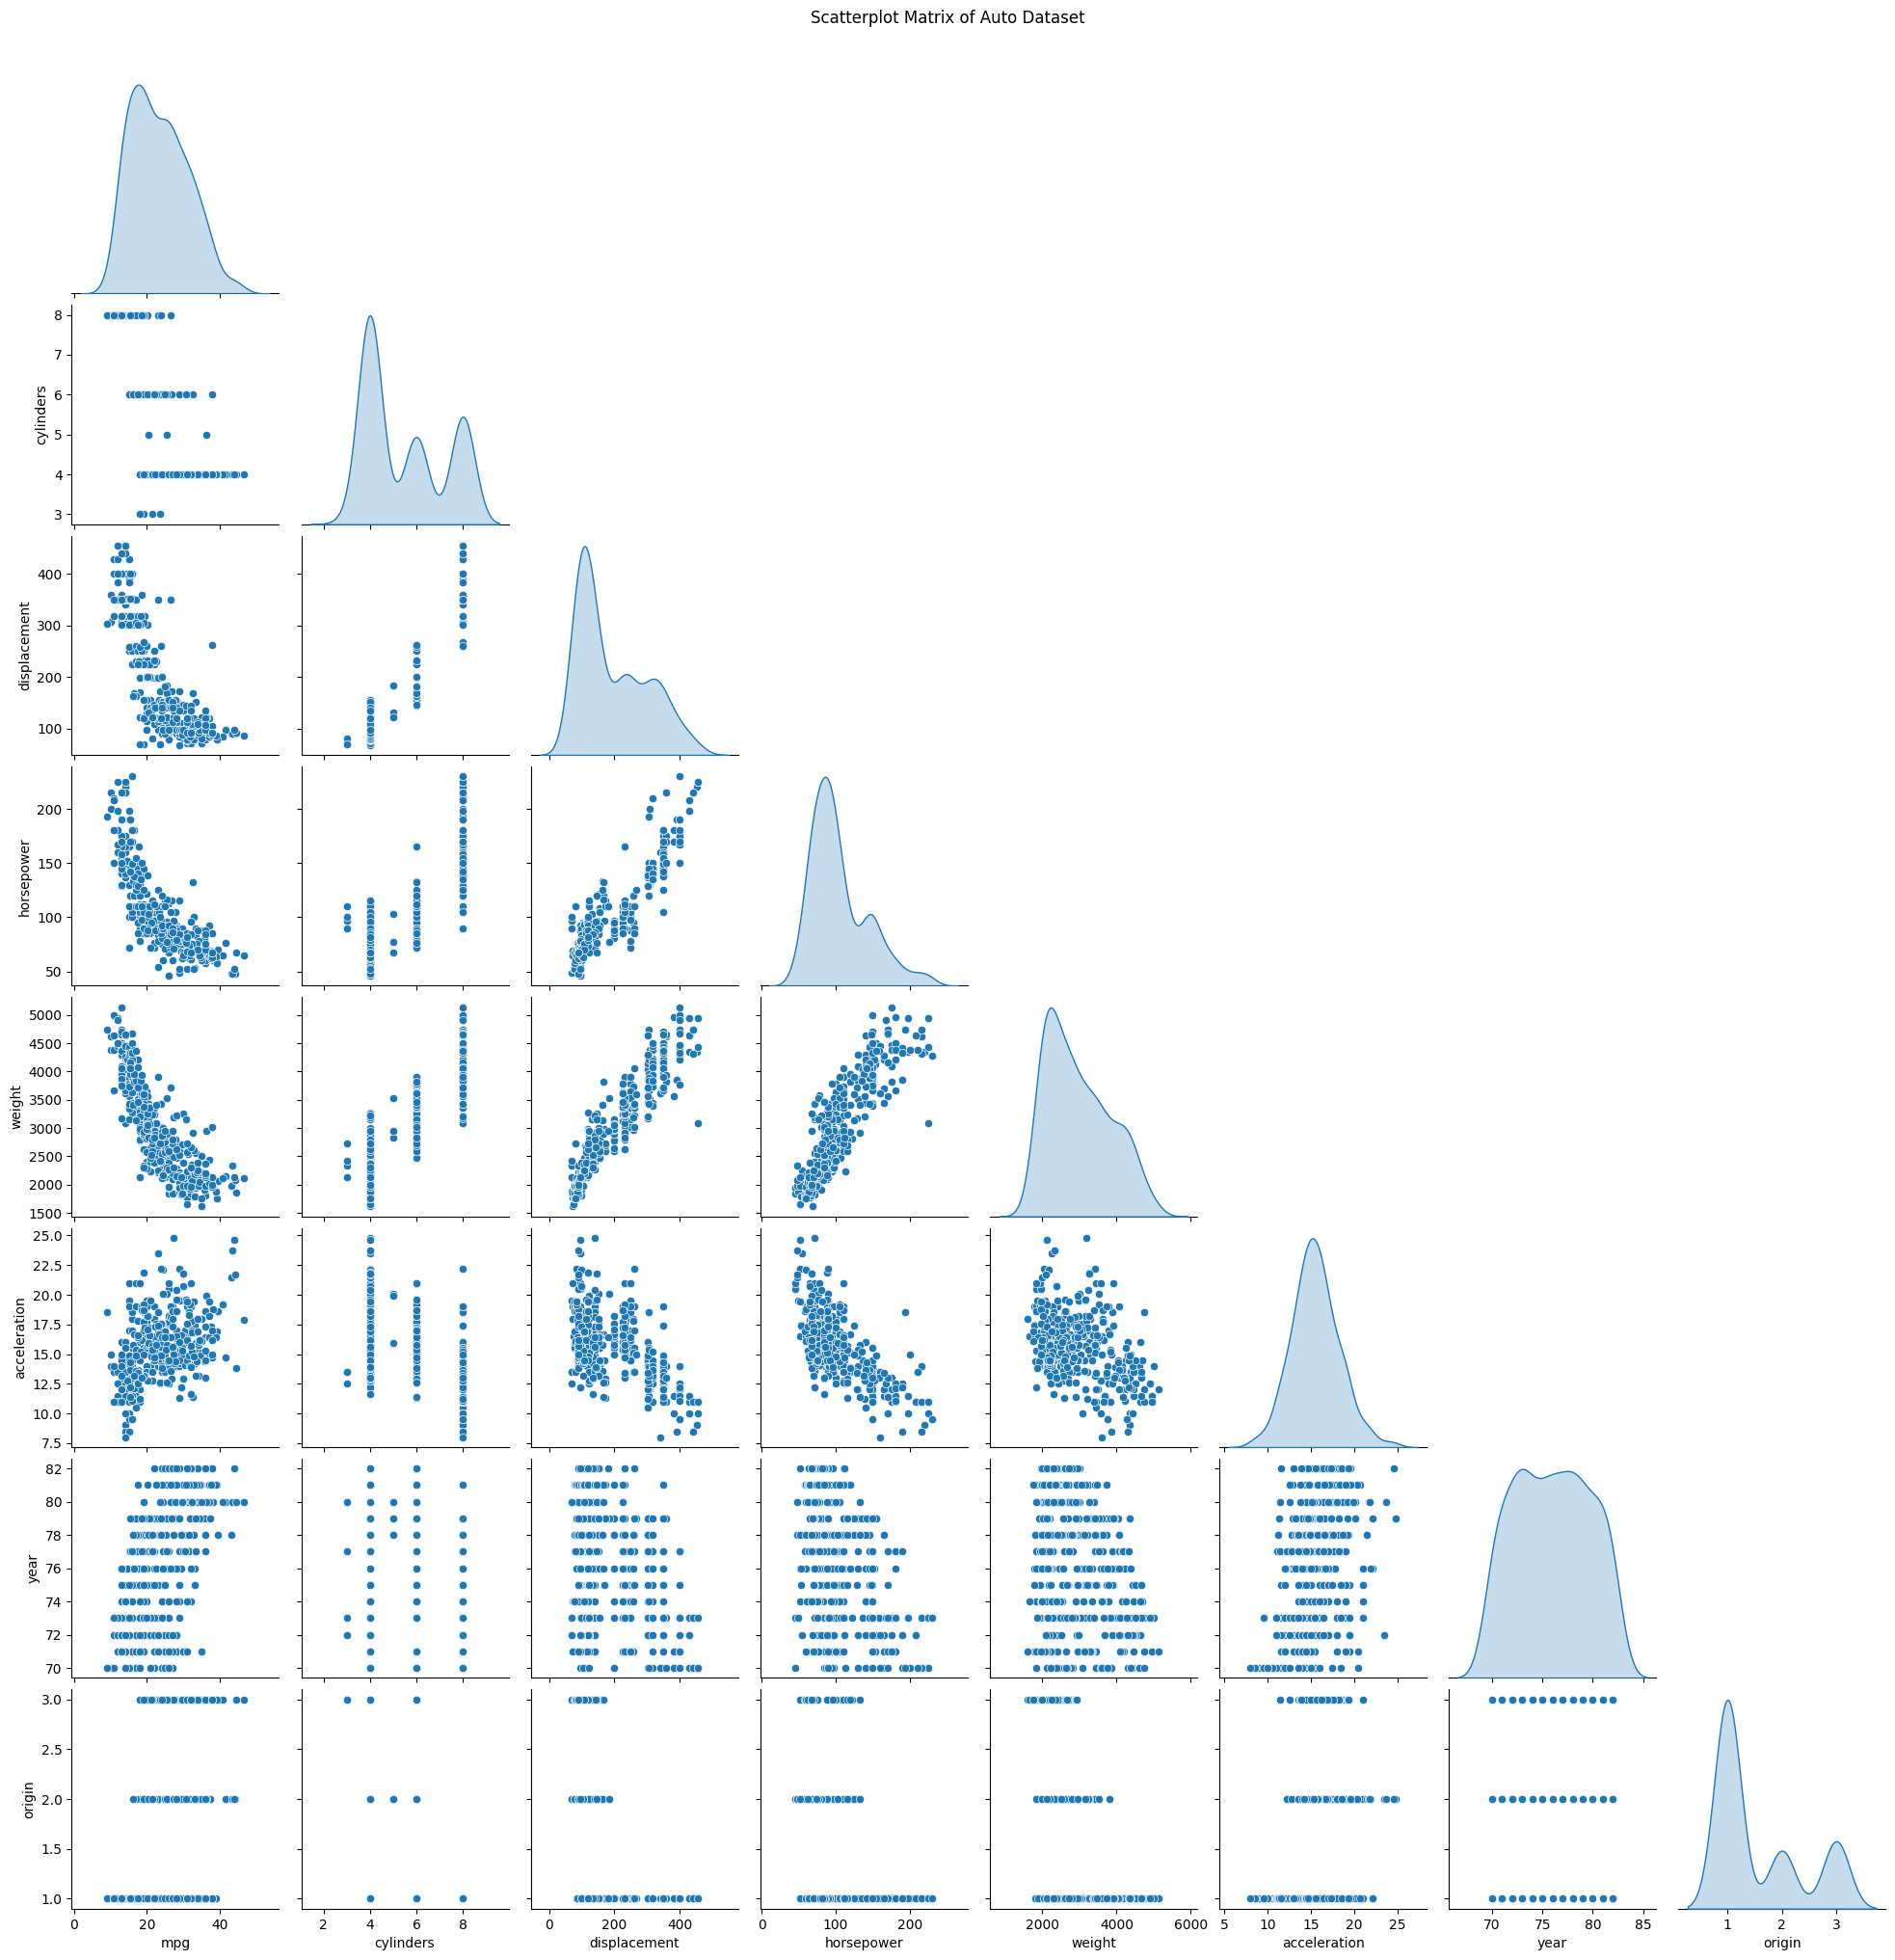

In [8]:
# Scatterplot matrix for all numeric variables
sns.pairplot(auto_numeric, diag_kind='kde', corner=True)
plt.suptitle("Scatterplot Matrix of Auto Dataset", y=1.02)
plt.show()

## 2. Quantitative correlation analysis

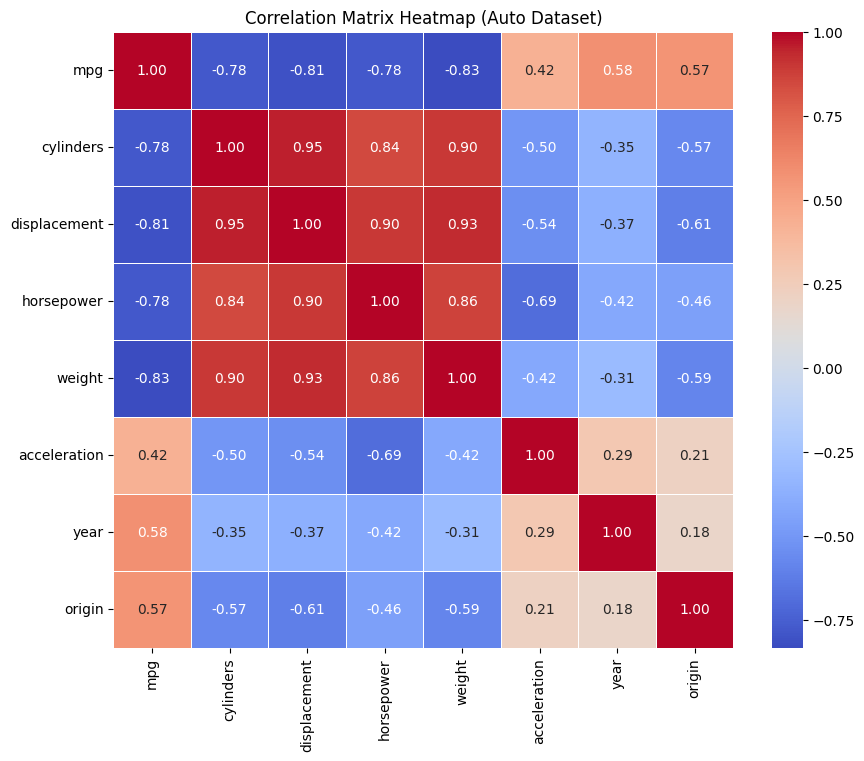

In [10]:
# Plot a heatmap of the correlation matrix
numeric_cols = auto_df.select_dtypes(include=['number']).columns
cor_matrix = auto_df[numeric_cols].corr()
# print("Correlation matrix (excluding 'name'):")
# print(cor_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Auto Dataset)")
plt.show()

## 3. Perform a multiple linear regression and give the summary of the results.

In [15]:
# Multiple linear regression: mpg as response, all other variables except 'name' as predictors

# Convert categorical variables to category dtype if needed
auto_df['origin'] = auto_df['origin'].astype('category')
auto_df['year'] = auto_df['year'].astype('category')
auto_df['cylinders'] = auto_df['cylinders'].astype('category')

# Fit the model
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto_df).fit()

print("Model Fitted.")
print(model.summary())

Model Fitted.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 15 Dec 2025   Prob (F-statistic):          2.64e-151
Time:                        23:52:42   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.916

**i. Is there a relationship between the predictors and the response?**


**ii. Which predictors appear to have a statistically significant relationship to the response?**


**iii. What does the coefficient for the year variable suggest?**

## 4. Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

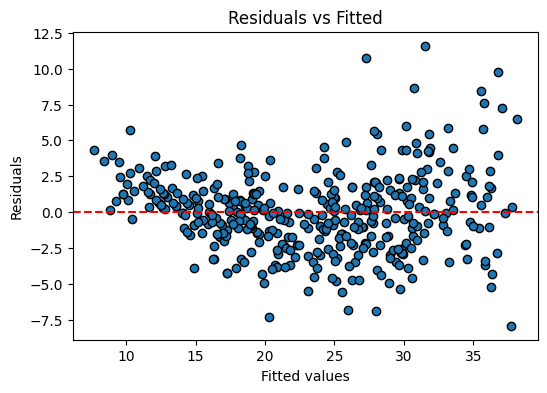

In [16]:
# Residuals vs Fitted
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, model.resid, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

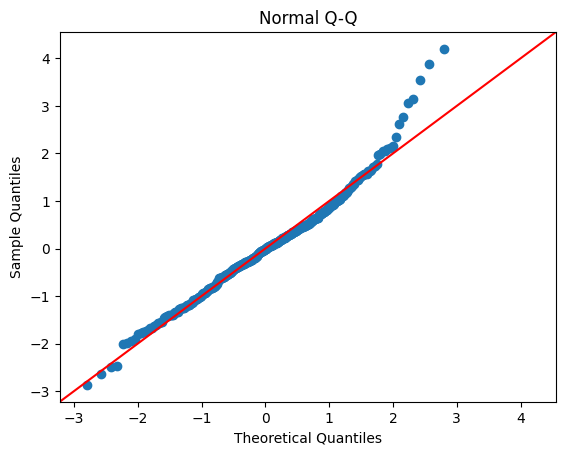

In [18]:
# Q-Q plot for normality of residuals
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Normal Q-Q')
plt.show()

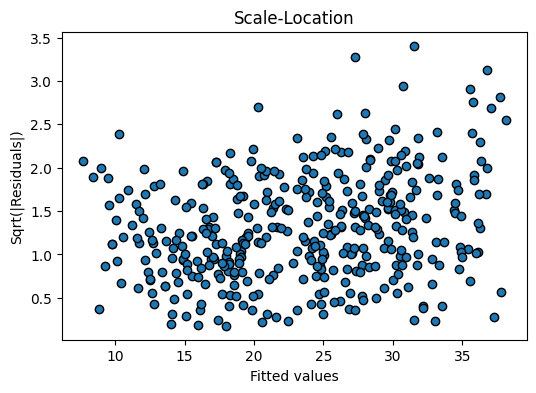

In [21]:
# Scale-Location plot (Spread of residuals)
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)), edgecolor='k')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location')
plt.show()

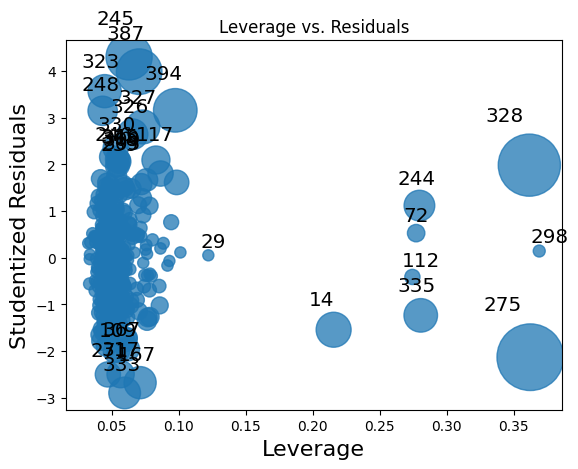

In [27]:
# Leverage plot
sm.graphics.influence_plot(model, criterion="cooks")
plt.title('Leverage vs. Residuals')
plt.show()

## 5. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [ ]:
# Fit a model with interaction effects between displacement and weight, and year and origin
interaction_model = smf.ols('mpg ~ cylinders + displacement * weight + horsepower + acceleration + year * origin', data=auto_df).fit()

print("Interaction Model Fitted.")# Try transformations: log, sqrt, and square for selected predictors

# Create transformed variables (avoid log(0) by adding a small constant if needed)
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_horsepower'] = np.sqrt(auto_df['horsepower'])
auto_df['displacement2'] = auto_df['displacement'] ** 2

# Fit a model with transformed variables
trans_model = smf.ols('mpg ~ cylinders + displacement2 + sqrt_horsepower + log_weight + acceleration + year + origin', data=auto_df).fit()

print("Transformed Model Fitted.")
print(trans_model.summary())# Try transformations: log, sqrt, and square for selected predictors

# Create transformed variables (avoid log(0) by adding a small constant if needed)
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_horsepower'] = np.sqrt(auto_df['horsepower'])
auto_df['displacement2'] = auto_df['displacement'] ** 2

# Fit a model with transformed variables
trans_model = smf.ols('mpg ~ cylinders + displacement2 + sqrt_horsepower + log_weight + acceleration + year + origin', data=auto_df).fit()

print("Transformed Model Fitted.")
print(trans_model.summary())
print(interaction_model.summary())

Interaction Model Fitted.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     73.11
Date:                Tue, 16 Dec 2025   Prob (F-statistic):          1.75e-151
Time:                        00:01:46   Log-Likelihood:                -891.41
No. Observations:                 392   AIC:                             1879.
Df Residuals:                     344   BIC:                             2069.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## 6. Try a few different transformations of the variables, such as log(X),√X,X2. Comment on your findings.

In [29]:
# Try transformations: log, sqrt, and square for selected predictors

# Create transformed variables (avoid log(0) by adding a small constant if needed)
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_horsepower'] = np.sqrt(auto_df['horsepower'])
auto_df['displacement2'] = auto_df['displacement'] ** 2

# Fit a model with transformed variables
trans_model = smf.ols('mpg ~ cylinders + displacement2 + sqrt_horsepower + log_weight + acceleration + year + origin', data=auto_df).fit()

print("Transformed Model Fitted.")
print(trans_model.summary())

Transformed Model Fitted.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 16 Dec 2025   Prob (F-statistic):          2.27e-164
Time:                        00:03:11   Log-Likelihood:                -922.40
No. Observations:                 392   AIC:                             1891.
Df Residuals:                     369   BIC:                             1982.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     